# Курсовой проект для курса Python для Data Science
студент Козубенко Алексей
дата 2022-06-24

# Импорт модулей и данных

In [159]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

In [162]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Done!')

Done!


In [163]:
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (10000, 20)
Test: (5000, 19)


In [164]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [165]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


# Функция оптимизации памяти

In [166]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [167]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [168]:
reduce_mem_usage(train)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.453125
9996,16265,27,2.0,64.307686,37.038422,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.156250
9997,2795,178,1.0,29.648056,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.906250
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.406250


In [169]:
reduce_mem_usage(test)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463676,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837055,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [170]:
# Преобразуем некоторы типы

In [171]:
train['Id'] = train['Id'].astype(str)
train['DistrictId'] = train['DistrictId'].astype(str)
train['Rooms'] = train['Rooms'].astype('int32')
train['HouseFloor'] = train['HouseFloor'].astype('int32')


In [172]:
train.dtypes

Id                 object
DistrictId         object
Rooms               int32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor          int32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [173]:
train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315720,37.199665,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,0.839512,21.058716,86.241219,28.560839,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  object  
 2   Rooms          10000 non-null  int32   
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  int32   
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

# Гистограмма распределения цены

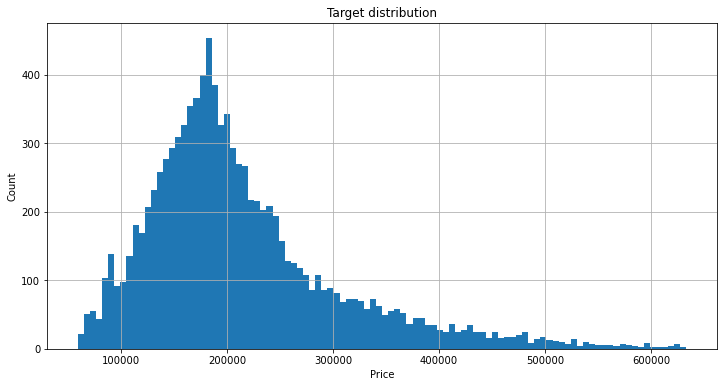

In [175]:
plt.figure(figsize = (12, 6))

train['Price'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

# Проверка данных
Объединим данные для проверки

In [176]:
total_data = pd.concat((train, test), sort=False).reset_index(drop=True)
total_data.drop(['Price'], axis=1, inplace=True)
print(f'total_data size is : {total_data.shape}')

total_data size is : (15000, 19)


Чиним количество комнат

In [177]:
total_data['Rooms'].value_counts()

2.0     5910
1.0     5474
3.0     3334
4.0      240
5.0       25
0.0       10
6.0        3
10.0       2
19.0       1
17.0       1
Name: Rooms, dtype: int64

In [178]:
total_data.loc[total_data['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2004,5927,57,10.0,59.056976,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B
2728,14865,9,10.0,60.871265,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B
6088,8491,1,19.0,42.006046,21.779287,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B
8794,14003,99,6.0,59.414333,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B
10956,4058,27,6.0,223.453690,104.113556,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
11981,1435,111,17.0,52.866108,32.528343,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B
12243,10793,23,6.0,110.750229,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B


In [179]:
total_data.loc[total_data['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B
3780,7317,27,0.0,41.790882,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B
6401,9443,27,0.0,87.762619,85.125473,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
7644,7917,27,0.0,212.932358,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B
7929,456,6,0.0,81.491447,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
9767,12638,27,0.0,138.427689,136.215500,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
10961,3343,58,0.0,116.824203,113.692421,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
14179,10729,27,0.0,76.345154,42.820797,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [180]:
# функция для комнат
def fix_rooms(target_df, mean_df):
    target_df.loc[target_df['Rooms'].isin([0, 6, 10, 17, 19]), 'Rooms'] = int(mean_df['Rooms'].median())
    return target_df

In [181]:
total_data['KitchenSquare'].value_counts()

1.0      3651
8.0      1912
5.0      1781
10.0     1633
6.0      1633
         ... 
26.0        1
72.0        1
35.0        1
123.0       1
97.0        1
Name: KitchenSquare, Length: 67, dtype: int64

In [182]:
# функция для площади кухни
def fix_KitchenSquare(target_df, mean_df):
    condition = (target_df['KitchenSquare'].isna()) \
             | (target_df['KitchenSquare'] > target_df['KitchenSquare'].quantile(.975))
    target_df.loc[condition, 'KitchenSquare'] = mean_df['KitchenSquare'].median()
    target_df.loc[target_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    return target_df

In [183]:
total_data['HouseYear'].value_counts().sort_index()

1908          1
1909          1
1910          2
1911          1
1912          3
           ... 
2018        248
2019        107
2020         28
4968          1
20052011      1
Name: HouseYear, Length: 105, dtype: int64

In [184]:
def fix_house_year(target_df):
    target_df.loc[target_df['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
    target_df.loc[target_df['HouseYear'] == 4968, 'HouseYear'] = 1968
    return target_df

In [185]:
total_data.loc[total_data['LifeSquare'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
26,8553,88,3.0,83.262527,4.769175,1.0,13,1.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B
119,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B
212,1182,27,1.0,38.936985,3.064320,0.0,18,19.0,2017,0.211401,B,B,9,1892,0,NaN,0,1,B
227,3746,62,1.0,46.722042,1.944446,1.0,11,12.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14863,1957,6,2.0,66.922722,5.230383,1.0,4,17.0,2019,0.243205,B,B,5,1564,0,540.0,0,0,B
14887,14015,6,2.0,65.743439,4.104411,1.0,15,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
14913,7021,1,2.0,65.607025,2.814241,0.0,16,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
14938,12024,25,1.0,44.925461,4.259876,1.0,27,1.0,2013,0.069753,B,B,53,13670,4,NaN,1,11,B


In [186]:
# функция для жилой площади
def fix_LifeSquare(target_df):
    target_df.loc[target_df['LifeSquare'] < 10, 'LifeSquare'] *= 10
    return target_df

In [187]:
total_data.loc[total_data['Square'] < 16]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B
328,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B
1401,9487,5,1.0,5.129221,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B
4496,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B
4800,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B
5009,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
7033,1748,88,2.0,5.497061,67.628716,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B
7470,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
8572,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
8805,10527,27,1.0,4.380726,40.805836,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B


# Обработка пропусков

In [188]:
total_data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [189]:
len(total_data) - total_data.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [190]:
def fix_LifeSquare2(target_df, mean_df):
    square_med_diff = (mean_df.loc[mean_df['LifeSquare'].notnull(), 'Square'] -\
                   mean_df.loc[mean_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   mean_df.loc[mean_df['LifeSquare'].notnull(), 'KitchenSquare']).median()
    target_df.loc[target_df['LifeSquare'].isnull(), 'LifeSquare'] =\
    target_df.loc[target_df['LifeSquare'].isnull(), 'Square'] -\
    target_df.loc[target_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
    square_med_diff
    
    return target_df

In [191]:
def drop_Healthcare_1(df):
    df.drop('Healthcare_1', axis=1, inplace=True)
    return df

# Признаки

In [192]:
total_data.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [193]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             15000 non-null  object  
 1   DistrictId     15000 non-null  object  
 2   Rooms          15000 non-null  float64 
 3   Square         15000 non-null  float32 
 4   LifeSquare     11846 non-null  float32 
 5   KitchenSquare  15000 non-null  float32 
 6   Floor          15000 non-null  int8    
 7   HouseFloor     15000 non-null  float64 
 8   HouseYear      15000 non-null  int32   
 9   Ecology_1      15000 non-null  float32 
 10  Ecology_2      15000 non-null  category
 11  Ecology_3      15000 non-null  category
 12  Social_1       15000 non-null  int8    
 13  Social_2       15000 non-null  int16   
 14  Social_3       15000 non-null  int16   
 15  Healthcare_1   7825 non-null   float32 
 16  Helthcare_2    15000 non-null  int8    
 17  Shops_1        15000 non-null  

In [194]:
feature_names = ['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1']
target_name = 'Price'

# Разбиение на train и test

In [195]:
X = train.drop(columns=target_name)
y = train[target_name]

In [196]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.\33, shuffle=True, random_state=42)

In [197]:
X_train = fix_rooms(X_train, X_train)
X_valid = fix_rooms(X_valid, X_train)
test = fix_rooms(test, X_train)

In [198]:
X_train = fix_KitchenSquare(X_train, X_train)
X_valid = fix_KitchenSquare(X_valid, X_train)
test = fix_KitchenSquare(test, X_train)

In [199]:
X_train = fix_house_year(X_train)
X_valid = fix_house_year(X_valid)
test = fix_house_year(test)

In [200]:
X_train = fix_LifeSquare(X_train)
X_valid = fix_LifeSquare(X_valid)
test = fix_LifeSquare(test)

In [201]:
X_train = fix_LifeSquare2(X_train, X_train)
X_valid = fix_LifeSquare2(X_valid, X_train)
test = fix_LifeSquare2(test, X_train)

In [202]:
X_train = drop_Healthcare_1(X_train)
X_valid = drop_Healthcare_1(X_valid)
test = drop_Healthcare_1(test)

In [203]:
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
test = test[feature_names]

In [204]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test.isna().sum().sum()

(0, 0, 0)

# Построение модели

In [205]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [206]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.961
Test R2:	0.719


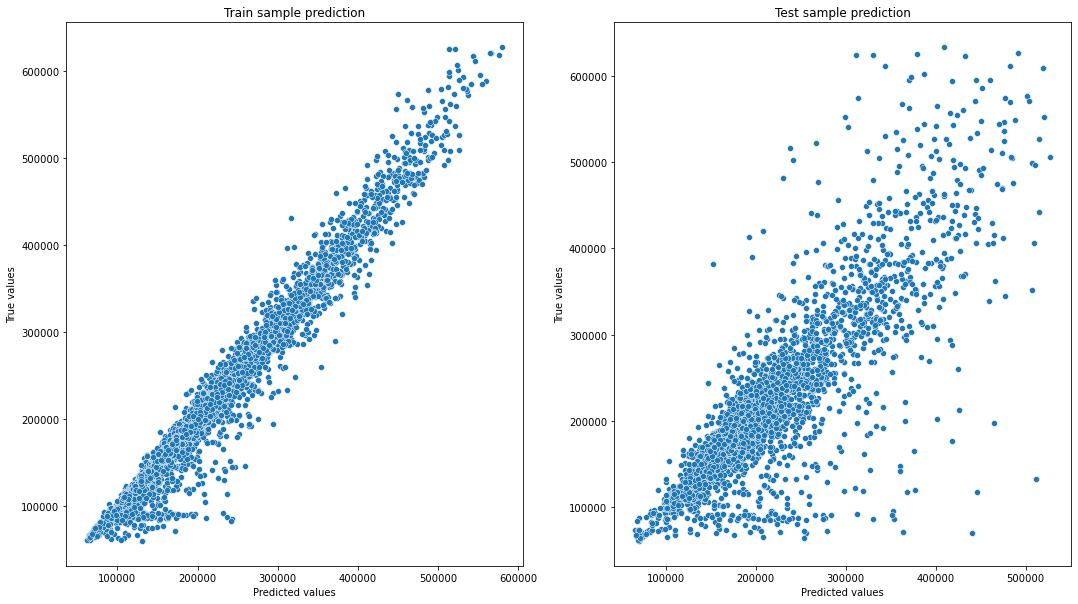

In [207]:
y_train_preds = model.predict(X_train)
y_valid_preds = model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

#  Прогнозирование на тестовом датасете

In [208]:
predictions = model.predict(test)
predictions

array([160288.18445312, 122394.85765625, 142751.815     , ...,
       145878.361875  , 193928.07171875, 265414.82273438])

In [209]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [210]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,160288.184453
1,5925,122394.857656
2,960,142751.815000
3,3848,139075.781562
4,746,191166.325469


In [211]:
submit.to_csv('kozubenko_v1.csv', index=False)